In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the saved dataset
updated_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/updated_sales_dataset_with_features.csv'
df_updated = pd.read_csv(updated_data_path)

# Display the first few rows to verify the dataset
df_updated.head()

,Invoice_Id,StockCode,Description,Quantity,Invoice_date,Price,Customer_Id,Country,Year,Month,...,Week,Season,Is_Christmas_Season,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Mean_30,Rolling_Sum_7,Rolling_Sum_30
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,...,48,Winter,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,15.30,NaN,NaN,NaN,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,...,48,Winter,0,20.34,NaN,NaN,NaN,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,22.00,NaN,NaN,NaN,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,20.34,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383418 entries, 0 to 383417
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Invoice_Id           383418 non-null  int64  
 1   StockCode            383418 non-null  object 
 2   Description          383418 non-null  object 
 3   Quantity             383418 non-null  int64  
 4   Invoice_date         383418 non-null  object 
 5   Price                383418 non-null  float64
 6   Customer_Id          383418 non-null  float64
 7   Country              383418 non-null  object 
 8   Year                 383418 non-null  int64  
 9   Month                383418 non-null  int64  
 10  Day                  383418 non-null  int64  
 11  DayOfWeek            383418 non-null  int64  
 12  Hour                 383418 non-null  int64  
 13  Weekday              383418 non-null  object 
 14  Quarter              383418 non-null  int64  
 15  Total_Sales      

# Performing sales forecasting using the ARIMA model for Monthly, Season, and Quarter sales.

# Monthly, Season, and Quarter sales forecasting.

# 1) Monthly Sales Forecasting

**Monthly Sales Data Preparation**

In [ ]:
# Aggregate data by Month
monthly_sales = df_updated.groupby(['Year', 'Month'])['Total_Sales'].sum().reset_index()

# Convert Year and Month to a datetime format
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Set the Date as the index
monthly_sales.set_index('Date', inplace=True)

# Prepare the series for ARIMA
monthly_sales_series = monthly_sales['Total_Sales']


**Fitting the ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model_monthly = ARIMA(monthly_sales_series, order=(5, 1, 0))
model_monthly_fit = model_monthly.fit()

# Print the summary
print(model_monthly_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Total_Sales   No. Observations:                   13
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -163.723
Date:                Mon, 26 Aug 2024   AIC                            339.446
Time:                        18:27:05   BIC                            342.355
Sample:                    12-01-2010   HQIC                           338.369
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5345      0.359     -1.488      0.137      -1.239       0.170
ar.L2         -0.1741      0.465     -0.375      0.708      -1.085       0.737
ar.L3         -0.4406      0.284     -1.550      0.1

**Forecasting with ARIMA**

**Forecasting Monthly Sales**

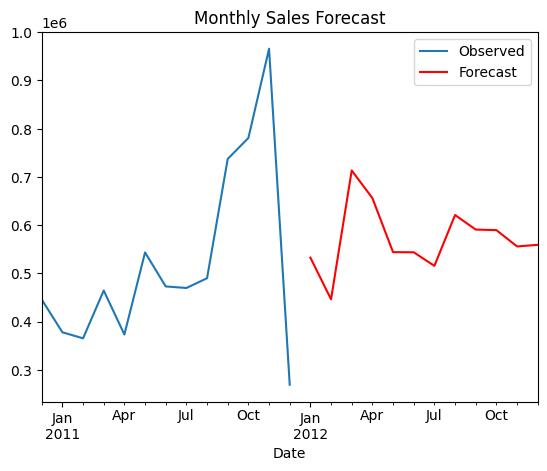

In [ ]:
# Forecast the next 12 months
monthly_forecast = model_monthly_fit.forecast(steps=12)

# Plot the forecast
monthly_sales_series.plot(label='Observed')
monthly_forecast.plot(label='Forecast', color='red')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.show()


**Visualization Analysis**

**Observed vs. Forecasted Sales:**

- The plot shows the actual (observed) sales data in blue and the forecasted values in red. The observed sales exhibit a noticeable upward trend with significant fluctuations, especially towards the end of the observed period.

- The forecasted values, however, show a clear deviation from the observed trend, especially after the model starts forecasting. The model struggles to capture the sharp increase in sales seen in the observed data.
Actionable Recommendations

**Evaluation of Forecasts for Monthly Sales**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example: Evaluation for Monthly Sales
mae_monthly = mean_absolute_error(monthly_sales_series[-12:], monthly_forecast)
rmse_monthly = mean_squared_error(monthly_sales_series[-12:], monthly_forecast, squared=False)

print(f'Monthly Sales MAE: {mae_monthly}')
print(f'Monthly Sales RMSE: {rmse_monthly}')


Monthly Sales MAE: 171138.97416874766
Monthly Sales RMSE: 205563.49465272395


**Interpretation of MAE and RMSE Metrics**

**Mean Absolute Error (MAE):**

- The MAE of 171,138.97 indicates the average absolute difference between the predicted and actual sales values. This value is relatively high, suggesting the model might not be performing well in terms of prediction accuracy.

**Root Mean Square Error (RMSE):**

- The RMSE of 205,563.49 is also quite high, indicating that the model has a significant error in its predictions. RMSE penalizes larger errors more than MAE, further highlighting the model's struggle with accurately forecasting monthly sales.


**Actionable Recommendations**

**Model Refinement:**

- Reevaluate the ARIMA Model Parameters: Given the lack of significance in the autoregressive terms, you may want to explore different (p, d, q) combinations or even use grid search to find a better-fitting model.

- Consider Seasonal Models: Since the sales data appears to have seasonal patterns, exploring a SARIMA (Seasonal ARIMA) model could better capture the seasonal components, potentially improving forecast accuracy.

- Incorporate External Factors: Consider adding external regressors, such as marketing activities, holidays, or economic indicators, to the model to help explain the observed volatility and improve the forecast.

**Alternative Models:**

- Try Prophet: Prophet, developed by Facebook, is particularly effective in handling seasonality and trends. Given the high volatility and seasonal patterns in the data, Prophet might provide better results.

- Explore Machine Learning Models: Machine learning approaches like Random Forest, XGBoost, or even deep learning models like LSTMs could better capture complex patterns in the data.

# 2) Seasonal Sales Forecasting

**Seasonal Sales Data Preparation**

In [ ]:
# Aggregate data by Season
season_sales = df_updated.groupby('Season')['Total_Sales'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index()

# Assume that each season represents a single point in time for simplicity (e.g., start of each season)
season_dates = pd.to_datetime(['2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01'])

# Add the dates to the season sales data
season_sales['Date'] = season_dates

# Set the Date as the index
season_sales.set_index('Date', inplace=True)

# Prepare the series for ARIMA
season_sales_series = season_sales['Total_Sales']


**Fitting ARIMA for Seasonal Sales**

In [ ]:
# Fit the ARIMA model
model_seasonal = ARIMA(season_sales_series, order=(1, 1, 0))  # Order might be simpler due to fewer data points
model_seasonal_fit = model_seasonal.fit()

# Print the summary
print(model_seasonal_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            Total_Sales   No. Observations:                    4
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -44.221
Date:                Mon, 26 Aug 2024   AIC                             92.443
Time:                        18:35:47   BIC                             90.640
Sample:                    01-01-2024   HQIC                            88.819
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0289      5.488     -0.005      0.996     -10.785      10.727
sigma2      4.069e+11   7.37e-11   5.52e+21      0.000    4.07e+11    4.07e+11
Ljung-Box (L1) (Q):                   0.12   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


**Forecasting Seasonal Sales**

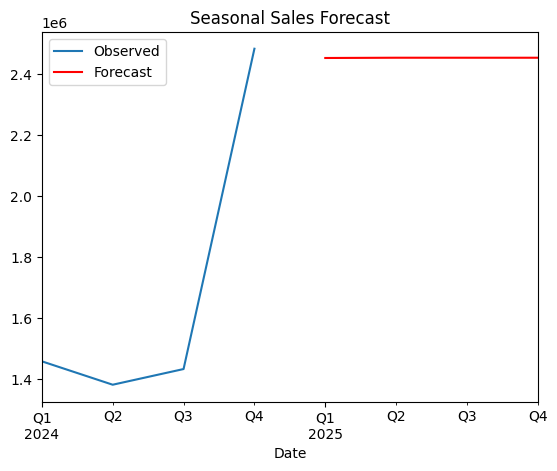

In [ ]:
# Forecast the next 4 seasons
seasonal_forecast = model_seasonal_fit.forecast(steps=4)

# Plot the forecast
season_sales_series.plot(label='Observed')
seasonal_forecast.plot(label='Forecast', color='red')
plt.title('Seasonal Sales Forecast')
plt.legend()
plt.show()


**The plot shows the observed sales data in blue and the forecasted values in red. The observed sales exhibit a sharp increase towards the end of the period, but the forecast is a flat line at a constant level, indicating that the model is not capturing the trend or variability in the data.**

**Evaluation of Forecasts for Season Sales**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming the last 4 seasons are used for comparison
# Adjust this if you have more historical data to compare
mae_seasonal = mean_absolute_error(season_sales_series[-4:], seasonal_forecast)
rmse_seasonal = mean_squared_error(season_sales_series[-4:], seasonal_forecast, squared=False)

print(f'Seasonal Sales MAE: {mae_seasonal}')
print(f'Seasonal Sales RMSE: {rmse_seasonal}')


Seasonal Sales MAE: 780158.6126222142
Seasonal Sales RMSE: 892870.3695216958


# Interpretation of MAE and RMSE Metrics

**Mean Absolute Error (MAE):**

- The MAE of 780,158.61 indicates the average absolute error between the forecasted and actual seasonal sales values. This high value suggests that the model's predictions are not very accurate.

**Root Mean Square Error (RMSE):**

- The RMSE of 892,870.37 is also quite high, indicating that the model has significant error in its predictions. RMSE penalizes larger errors more than MAE, highlighting the model's struggles with forecasting accuracy.

# Actionable Recommendations

**Model Improvement:**

**Reevaluate the ARIMA Model Parameters:**

- The lack of significance in the autoregressive term and the high error metrics, consider trying different (p, d, q) combinations or using grid search to find a better-fitting model.

**Consider Seasonal ARIMA (SARIMA):**

- Since the data is seasonal, using a SARIMA model with explicit seasonal components could better capture the seasonality in the sales data.

**Incorporate External Variables:**

- Adding external regressors, such as holiday periods, promotions, or economic indicators, could help explain the sharp changes in sales and improve forecast accuracy.

# 3) Quarterly Sales Forecasting

**Data Preparation**

In [ ]:
# Aggregate data by Quarter
quarter_sales = df_updated.groupby(['Year', 'Quarter'])['Total_Sales'].sum().reset_index()

# Convert Year and Quarter to a datetime format
quarter_sales['Date'] = pd.to_datetime(quarter_sales['Year'].astype(str) + 'Q' + quarter_sales['Quarter'].astype(str))

# Set the Date as the index
quarter_sales.set_index('Date', inplace=True)

# Prepare the series for ARIMA
quarter_sales_series = quarter_sales['Total_Sales']


**Fitting ARIMA for Quarterly Sales**

In [ ]:
# Fit the ARIMA model
model_quarterly = ARIMA(quarter_sales_series, order=(5, 1, 0))
model_quarterly_fit = model_quarterly.fit()

# Print the summary
print(model_quarterly_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Total_Sales   No. Observations:                    5
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -55.416
Date:                Mon, 26 Aug 2024   AIC                            122.831
Time:                        18:36:07   BIC                            119.149
Sample:                    10-01-2010   HQIC                           114.751
                         - 10-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2772   3.48e+04   7.97e-06      1.000   -6.82e+04    6.82e+04
ar.L2          0.1184   2.02e+05   5.85e-07      1.000   -3.96e+05    3.96e+05
ar.L3         -0.1066   1.47e+05  -7.26e-07      1.0

**Forecasting Quarterly Sales**

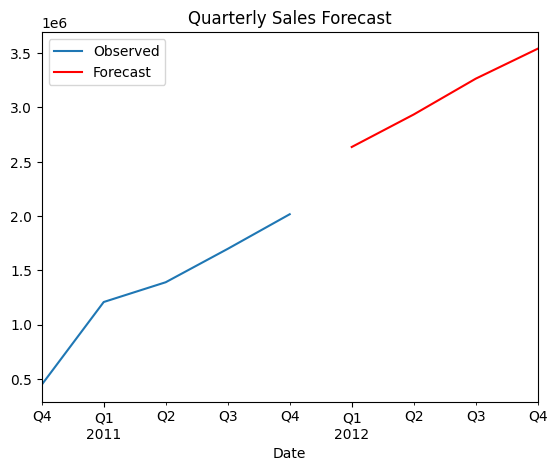

In [ ]:
# Forecast the next 4 quarters
quarterly_forecast = model_quarterly_fit.forecast(steps=4)

# Plot the forecast
quarter_sales_series.plot(label='Observed')
quarterly_forecast.plot(label='Forecast', color='red')
plt.title('Quarterly Sales Forecast')
plt.legend()
plt.show()


**The plot shows that the observed sales exhibit an upward trend, but the forecasted values (in red) continue to increase at a linear rate, without capturing any potential seasonality or other dynamics present in the observed data. The forecast appears to be a simple linear extrapolation, which does not accurately reflect the actual sales pattern.**

**Evaluation of Forecasts for Quarterly Sales**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming the last 4 quarters are used for comparison
mae_quarterly = mean_absolute_error(quarter_sales_series[-4:], quarterly_forecast)
rmse_quarterly = mean_squared_error(quarter_sales_series[-4:], quarterly_forecast, squared=False)

print(f'Quarterly Sales MAE: {mae_quarterly}')
print(f'Quarterly Sales RMSE: {rmse_quarterly}')


Quarterly Sales MAE: 1515730.9823154425
Quarterly Sales RMSE: 1516666.0886295254


**Interpretation  of MAE and RMSE Metrics**

**Mean Absolute Error (MAE):**

- The MAE of 1,515,730.98 indicates the average absolute error between the forecasted and actual quarterly sales values. This very high value suggests that the model's predictions are not accurate.

**Root Mean Square Error (RMSE):**

- The RMSE of 1,516,666.09 is also very high, indicating that the model has significant error in its predictions. RMSE penalizes larger errors more than MAE, highlighting the model's struggles with forecasting accuracy.

# Actionable Recommendations

**Model Improvement:**

**Reevaluate ARIMA Model Parameters:**

- Given the lack of significance in the autoregressive terms and the high error metrics, consider experimenting with different (p, d, q) combinations or using grid search to find a better-fitting model.

**Consider Adding Seasonal Components:**

- Since the data is quarterly, there may be seasonality present. Consider using a SARIMA model, which includes seasonal components, to better capture the quarterly patterns.

**Explore Alternative Models:**

- Prophet Model: Prophet, developed by Facebook, might better capture the trend and seasonality in quarterly data. Prophet is particularly effective at handling seasonality and trends, making it worth considering.

**Machine Learning Models:**

- Consider using machine learning models such as XGBoost or Random Forest, which can handle complex patterns and interactions, particularly if more features (e.g., lagged values, external variables) are added.